<a href="https://colab.research.google.com/github/NIP-Data-Computation/colabtools/blob/master/geneb_show_and_tell_week8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Week 8 Datacamp Show and Tell**

Gene Carlo Belinario



*   Python Datascience Toolbox - Part 2
*   Writing Efficient Python Code



In [1]:
#Mount drive
from google.colab import drive
drive.mount('/content/drive')

#Check if files in the directory are existing and accessible
!ls drive/My\ Drive/NIP-Data-Computation-Group-Drive/Datasets/PHL\ Customs\ Open\ Data/clean/csv

Mounted at /content/drive
boc_lite_2012_2019_top9_hscode.csv  boc_lite_2015.csv  boc_lite_2019.csv
boc_lite_2012.csv		    boc_lite_2016.csv  gapminder.csv
boc_lite_2013.csv		    boc_lite_2017.csv
boc_lite_2014.csv		    boc_lite_2018.csv


In [2]:
%cd drive/My\ Drive/NIP-Data-Computation-Group-Drive/Datasets/PHL\ Customs\ Open\ Data/clean/csv

/content/drive/.shortcut-targets-by-id/1pfxnf06OodnUo3H4NgkxVN6pA2FI9hh_/NIP-Data-Computation-Group-Drive/Datasets/PHL Customs Open Data/clean/csv


In [3]:
#Import modules
import pandas as pd
import matplotlib.pyplot as plt

For this show and tell, I'll be utilizing the 2019 BOC data.

In [4]:
#Open and store the csv file using pandas
boc19 = pd.read_csv('boc_lite_2019.csv', encoding='ISO-8859-1')

#Print info about the csv file
print(boc19.info())

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3794763 entries, 0 to 3794762
Data columns (total 30 columns):
 #   Column                Dtype  
---  ------                -----  
 0   uid                   object 
 1   ty                    int64  
 2   tq                    object 
 3   tm                    object 
 4   entry                 float64
 5   hscode                int64  
 6   goodsdescription      object 
 7   p                     float64
 8   q                     float64
 9   m_fob                 float64
 10  m_cif                 float64
 11  fx_usd                float64
 12  dutiablevalueforeign  float64
 13  exchangerate          float64
 14  currency              object 
 15  dutiablevaluephp      float64
 16  dutypaid              int64  
 17  exciseadvalorem       int64  
 18  arrastre              float64
 19  wharfage              float64
 20  vatbase               int64  
 21  vatpaid               int64  
 22  othertax              float64
 23  finesan

In [5]:
#Print a few rows for a glimpse of the data set
print(boc19.head(1))

               uid    ty      tq  ... countryexport_iso3  subport  port
0  201901 00000001  2019  2019q1  ...                CHN      NaN   NaN

[1 rows x 30 columns]


Suppose I want to know the total mass of import transaction in specific countries, say for example imports from Japan.

In [6]:
jpn_mass = boc19[boc19['countryexport_iso3'] == 'JPN']
print(jpn_mass.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629121 entries, 3 to 3794727
Data columns (total 30 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   uid                   629121 non-null  object 
 1   ty                    629121 non-null  int64  
 2   tq                    629121 non-null  object 
 3   tm                    629121 non-null  object 
 4   entry                 0 non-null       float64
 5   hscode                629121 non-null  int64  
 6   goodsdescription      628966 non-null  object 
 7   p                     629121 non-null  float64
 8   q                     629121 non-null  float64
 9   m_fob                 629121 non-null  float64
 10  m_cif                 629121 non-null  float64
 11  fx_usd                629121 non-null  float64
 12  dutiablevalueforeign  629121 non-null  float64
 13  exchangerate          629121 non-null  float64
 14  currency              629121 non-null  object 
 15 

In [7]:
#Compute the sum of the masses of the import and divide by 1000 to convert units to metric tons
jpn_total = jpn_mass['q'].sum() / 1000
print(jpn_total)


5667085.176095491


It is easy to compute the total mass of the imports coming from one country. But what if we want to do it in other countries as well without retyping the same code over and over again?

In [8]:
#Define a function that computes the total mass of the import of a country
def totalmass(country):
  return boc19[boc19['countryexport_iso3'] == country]['q'].sum() / 1000

print(totalmass('JPN'))

5667085.176095491


In [9]:
#We can use this function to check other country's total mass of the imports

#From China
print('China =', totalmass('CHN'), 'metric tons')

#From Vietnam
print('Vietnam =', totalmass('VNM'), 'metric tons')

#From USA
print('USA =', totalmass('USA'), 'metric tons')

#From UAE
print('UAE =', totalmass('ARE'), 'metric tons')

China = 21702591.83363481 metric tons
Vietnam = 9820359.966967791 metric tons
USA = 7620505.724825105 metric tons
UAE = 2406516.8535998943 metric tons


However, if the data source is being streamed, one can also define a function that updates the total mass as new data for a country is added. 

In [ ]:
#Define a function that calculates total mass of imports from a country
def totalmass_country(country_code):
  total = 0
  for chunk in pd.read_csv('boc_lite_2019.csv', chunksize=1000, encoding='ISO-8859-1'):
    total += sum(chunk[chunk['countryexport_iso3'] == country_code]['q'])
  return print(country_code, '=', total/1000 , 'metric tons')

In [ ]:
#Check this function for Japan and see if it is the same
totalmass_country('JPN')

JPN = 5667085.176095491 metric tons


In [ ]:
#We can also check total imports from other countries:

#Total mass of imports from China
totalmass_country('CHN')

#Total mass of imports from Vietnam
totalmass_country('VNM')

#Total mass of imports from USA
totalmass_country('USA')

#Total mass of imports from UAE
totalmass_country('ARE')

CHN = 21702591.833634816 metric tons
VNM = 9820359.96696782 metric tons
USA = 7620505.724825122 metric tons
ARE = 2406516.8535998906 metric tons


Suppose we want to visually compare the total masses of imports from select countries. Say for example, we want to compare total imports coming from 10 countries: Japan (JPN), China (CHN), Vietnam (VNM), USA (USA), UAE (ARE), India (IND), Malaysia (MYS), Russia (RUS), Italy (ITA), and Philippines (PHL). 

In [10]:
#Store country names in a list
selected_country = ['JPN', 'CHN', 'VNM', 'USA', 'ARE', 'IND', 'MYS', 'RUS', 'ITA', 'PHL']

#Using dictionary comprehension, create a dictionary of total mass of imports for each country
total_selected_country = {country : totalmass(country) for country in selected_country}

print(total_selected_country)

{'JPN': 5667085.176095491, 'CHN': 21702591.83363481, 'VNM': 9820359.966967791, 'USA': 7620505.724825105, 'ARE': 2406516.8535998943, 'IND': 1444832.4162828834, 'MYS': 4963905.104866741, 'RUS': 2685486.8602613285, 'ITA': 317496.1639535887, 'PHL': 110.46157000282}


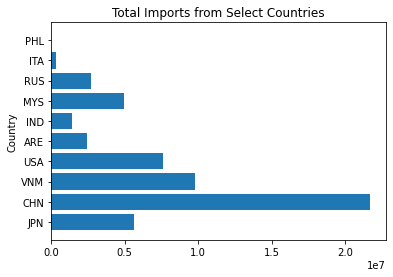

In [11]:
#Plot a bar graph
plt.barh(list(total_selected_country.keys()), total_selected_country.values())
plt.title("Total Imports from Select Countries")
plt.ylabel('Country')
plt.show()

Now suppose out of curiosity, we want to know all the total masses of all imports from all countries on 2019. 

In [12]:
#Extract all counntries where imports came into a list
all_countries = boc19['countryexport_iso3'].unique()

#Use dictionary comprehension to record total imports from each country
total_all_countries = {countries : totalmass(countries) for countries in all_countries}

print(all_countries)

['CHN' 'TWN' 'JPN' 'IDN' 'THA' 'RUS' 'MYS' 'KOR' 'VNM' 'PAK' 'UNS' 'SGP'
 'HKG' 'USA' 'DEU' 'ESP' 'IND' 'CAN' 'NLD' 'BRA' 'IRL' 'CHL' 'AUS' 'DNK'
 'ARG' 'ARE' 'BEL' 'POL' 'CHE' 'ITA' 'SWE' 'GBR' 'NOR' 'FIN' 'NZL' 'FRA'
 'ZAF' 'LKA' 'LSO' 'TUR' 'HUN' 'SVN' 'GAB' 'SDN' 'URY' 'KHM' 'EGY' 'BGD'
 'SAU' 'PRT' 'PRK' 'AUT' 'MMR' 'TZA' 'SLB' 'ISR' 'MEX' 'ANT' 'PNG' 'CXR'
 'NFK' 'QAT' 'IRN' 'COL' 'UKR' 'GUM' 'FJI' 'OMN' 'BHR' 'ROU' 'MDV' 'JOR'
 'CZE' 'GRC' 'CYP' 'LUX' 'CRI' 'LVA' 'MAC' 'BLZ' 'DOM' 'LTU' 'PER' 'BGR'
 'MDG' 'MDA' 'HND' 'PAN' 'ECU' 'KEN' 'EST' 'SVK' 'VGB' 'MAR' 'TUN' 'BRN'
 'UZB' 'NIC' 'LIE' 'CUB' 'SYC' 'NGA' 'MLT' 'NTZ' 'NPL' 'MCO' 'MNG' 'MUS'
 'WSM' 'GTM' 'KWT' 'SRB' 'UMI' 'LBN' 'AGO' 'KAZ' 'PRI' 'LCA' 'GEO' 'MNP'
 'SWZ' 'HTI' 'SLV' 'ETH' 'TLS' 'GHA' 'ISL' 'CIV' 'MKD' 'IRQ' 'MHL' 'LAO'
 'ZWE' 'MWI' 'VIR' 'KIR' 'GNQ' 'GIN' 'HRV' 'PLW' 'SLE' 'BLR' 'ERI' 'SER'
 'SMR' 'ZAR' 'PYF' 'AND' 'YEM' 'JAM' 'FSM' 'VEN' 'GIB' 'BIH' 'BMU' 'NAM'
 'AIA' 'UGA' 'GMB' 'CMR' 'VUT' 'BOL' 'FRO' 'PRY' 'B

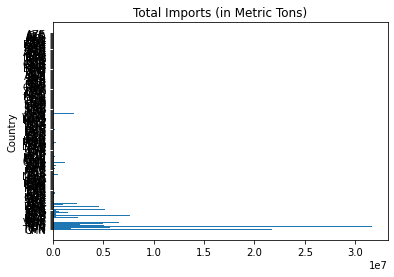

In [13]:
#Plot 
plt.barh(list(total_all_countries.keys()), total_all_countries.values())
plt.title("Total Imports (in Metric Tons)")
plt.ylabel('Country')
plt.show()

In [14]:
#Filter countries that made total imports greater than 1 million metric tons
greater_countries = {countries : totalmass(countries) for countries in all_countries if totalmass(countries) >= 10.0**6}

print(greater_countries)

{'CHN': 21702591.83363481, 'TWN': 1814389.4682337032, 'JPN': 5667085.176095491, 'IDN': 31657720.777430832, 'THA': 5042318.974965865, 'RUS': 2685486.8602613285, 'MYS': 4963905.104866741, 'KOR': 6559217.339144079, 'VNM': 9820359.966967791, 'SGP': 2502568.7986735934, 'USA': 7620505.724825105, 'IND': 1444832.4162828834, 'BRA': 5193867.1140030045, 'AUS': 4535027.2703483505, 'ARE': 2406516.8535998943, 'SAU': 2779821.1895144177, 'UKR': 1243409.9124615123, 'KWT': 2092326.6586499969}


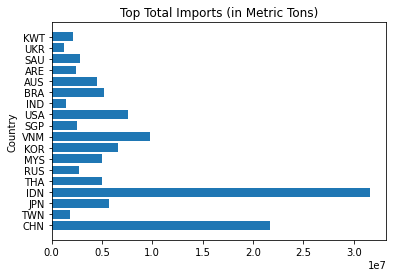

In [18]:
#Plot filtered countries. Apparently, values in the dictionary cannot be sorted.
plt.barh(list(greater_countries.keys()), greater_countries.values())
plt.title("Top Total Imports (in Metric Tons)")
plt.ylabel('Country')
plt.show()